see https://github.com/huggingface/pytorch-pretrained-BigGAN

In [1]:
! pip install pytorch-pretrained-biggan
! pip install nltk

In [2]:
import torch
import matplotlib.pyplot as plt
from pytorch_pretrained_biggan import (BigGAN, one_hot_from_names, truncated_noise_sample, convert_to_images)

c:\Users\70p6229\computer_vision\examples\pytorch\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


BigGAN is a class-conditional GAN, meaning it generates images based on ImageNet class labels (1,000 categories like "dog," "cat," "airplane") rather than free-form text prompts.

load pre-trained model tokenizer (vocabulary)

In [3]:
model = BigGAN.from_pretrained('biggan-deep-256')

In [4]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\70p6229\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Create a one-hot vector from the name of an imagenet class ('tennis ball', 'daisy', ...). We use NLTK's wordnet search to try to find the relevant synset of ImageNet and take the first one. If we can't find it direcly, we look at the hyponyms and hypernyms of the class name.

In [5]:
truncation = 0.4
class_vector = one_hot_from_names(['soap bubble', 'coffee', 'mushroom'], batch_size=3)
noise_vector = truncated_noise_sample(truncation=truncation, batch_size=3)

noise_vector = torch.from_numpy(noise_vector)
class_vector = torch.from_numpy(class_vector)

In [6]:
noise_vector = noise_vector.to('cuda')
class_vector = class_vector.to('cuda')
model.to('cuda')

BigGAN(
  (embeddings): Linear(in_features=1000, out_features=128, bias=False)
  (generator): Generator(
    (gen_z): Linear(in_features=256, out_features=32768, bias=True)
    (layers): ModuleList(
      (0): GenBlock(
        (bn_0): BigGANBatchNorm(
          (scale): Linear(in_features=256, out_features=2048, bias=False)
          (offset): Linear(in_features=256, out_features=2048, bias=False)
        )
        (conv_0): Conv2d(2048, 512, kernel_size=(1, 1), stride=(1, 1))
        (bn_1): BigGANBatchNorm(
          (scale): Linear(in_features=256, out_features=512, bias=False)
          (offset): Linear(in_features=256, out_features=512, bias=False)
        )
        (conv_1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn_2): BigGANBatchNorm(
          (scale): Linear(in_features=256, out_features=512, bias=False)
          (offset): Linear(in_features=256, out_features=512, bias=False)
        )
        (conv_2): Conv2d(512, 512, kernel_size=(3, 

In [7]:
with torch.no_grad():
    output = model(noise_vector, class_vector, truncation)

output = output.to('cpu')

In [8]:
images = convert_to_images(output)

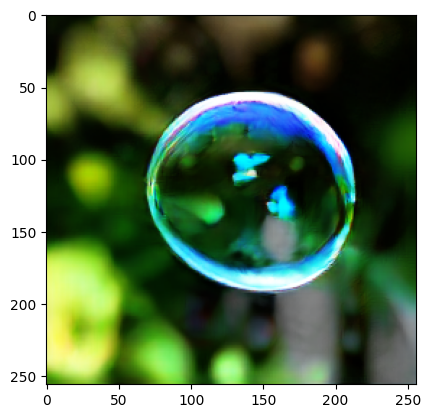

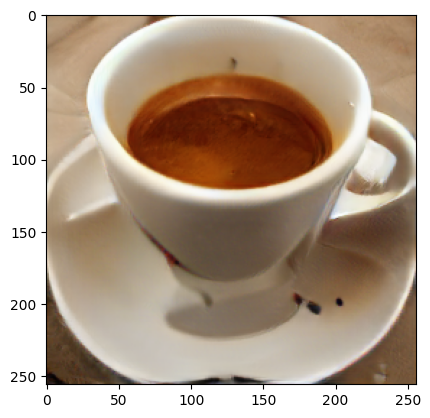

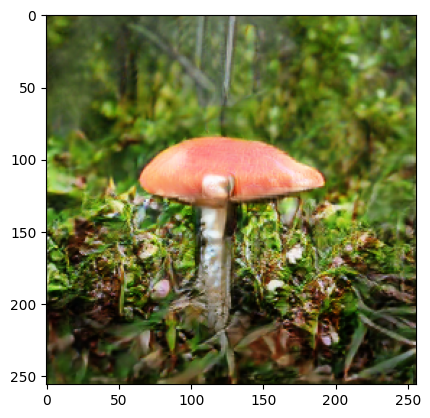

In [9]:
for image in images:
    plt.imshow(image)
    plt.show()